In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# First let's take a look at the data, that is available to us.
# The first file we have is called `ufc-fights-model.csv`.
# This file contains raw fight data, which we can use to train a model,
# to predict fights with.

df = pd.read_csv("UFC-data/ufc-fights-model.csv").drop(columns=["Unnamed: 0"])

print(df.columns)

Index(['Name', 'Height', 'Weight', 'Reach', 'Stance', 'DOB', 'SLpm', 'SAcc',
       'SApm', 'StrDef', 'TDAvg', 'TDAcc', 'TDDef', 'SubAvg', 'AvgTime2Win',
       'Name.1', 'Height.1', 'Weight.1', 'Reach.1', 'Stance.1', 'DOB.1',
       'SLpm.1', 'SAcc.1', 'SApm.1', 'StrDef.1', 'TDAvg.1', 'TDAcc.1',
       'TDDef.1', 'SubAvg.1', 'AvgTime2Win.1', 'Win'],
      dtype='object')


In [27]:
# We can see that this dataset contains metrics for each fighter.
# Each fighter has a name, height, weight, reach, stance, date of birth,
# but also things like Take Down Average, Strength Defence, Strice Accuracy and Submission Average.
# This is the data we will use to train a model with, which will predict fights.
# The last column: `Win` will be used to label the data.
# Before the AI can train with this data, the data needs to be preprocessed.
# We can call the preprocessor script to preprocess the entire dataset, which will be used for training,
# or we can preprocess a single fighter, if we want to predict this fighters fights.

from preprocessor import preprocess

preprocess("Conor McGregor", 0.25)
preprocess("Khabib Nurmagomedov", 0.25)

(6, 32)
(3, 32)
(6, 1)
(3, 1)
(8, 32)
(3, 32)
(8, 1)
(3, 1)


(2540, 32)
(636, 32)
(2540, 1)
(636, 1)
Train on 2540 samples, validate on 636 samples
Epoch 1/20
2540/2540 [==============================] - 1s 462us/step - loss: 0.6919 - accuracy: 0.5228 - val_loss: 0.6708 - val_accuracy: 0.6792
Epoch 2/20
2540/2540 [==============================] - 1s 262us/step - loss: 0.6693 - accuracy: 0.5846 - val_loss: 0.6130 - val_accuracy: 0.6918
Epoch 3/20
2540/2540 [==============================] - 1s 274us/step - loss: 0.6340 - accuracy: 0.6386 - val_loss: 0.6054 - val_accuracy: 0.6934
Epoch 4/20
2540/2540 [==============================] - 1s 365us/step - loss: 0.6131 - accuracy: 0.6606 - val_loss: 0.5865 - val_accuracy: 0.7233
Epoch 5/20
2540/2540 [==============================] - 1s 239us/step - loss: 0.6069 - accuracy: 0.6807 - val_loss: 0.5804 - val_accuracy: 0.7028
Epoch 6/20
2540/2540 [==============================] - 1s 244us/step - loss: 0.5999 - accuracy: 0.6756 - val_loss: 0.5627 - val_accuracy: 0.7217
Epoch 7/20
2540/2540 [===============

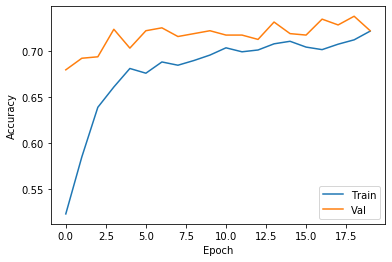

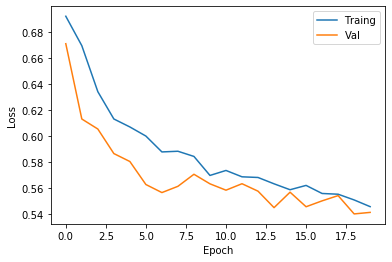

In [28]:
import train

preprocess("", 0.20)
train.main()

In [40]:
# This script has created 4 files, for each fighter, in the `models/` directory.
# This these 4 files are `x_train.npy`, `x_test.npy`, `y_train.npy` and `y_test.npy`.
# These are binary numpy files, which can directly be read with our model.
# Now that we have preprocessed Conor McGregor and Khabib Nurmagomedov, we can
# let our model predict those fights.

from predict import predict

predict("Conor McGregor")
predict("Khabib Nurmagomedov")

Actual: [1]     Prediction: [0.03594884]      Error: [0.96405116]
MISS
Actual: [1]     Prediction: [0.99942625]      Error: [0.00057375]
CORRECT
Actual: [1]     Prediction: [0.98735577]      Error: [0.01264423]
CORRECT
Actual: [1]     Prediction: [0.27439827]      Error: [0.72560173]
MISS
Actual: [0]     Prediction: [0.9983675]      Error: [0.99836749]
MISS
Actual: [1]     Prediction: [0.782108]      Error: [0.21789199]
CORRECT
Actual: [1]     Prediction: [0.17706937]      Error: [0.82293063]
MISS
Actual: [1]     Prediction: [0.03333148]      Error: [0.96666852]
MISS
Actual: [0]     Prediction: [0.99868196]      Error: [0.99868196]
MISS
##########################################
Correct: 3      Fault: 6
Accuracy: 0.3333333333333333
Actual: [1]     Prediction: [0.9998501]      Error: [0.00014991]
CORRECT
Actual: [1]     Prediction: [0.9980264]      Error: [0.00197363]
CORRECT
Actual: [0]     Prediction: [4.4107437e-06]      Error: [4.41074371e-06]
CORRECT
Actual: [0]     Prediction: [0.

(11, 0, 1.0)

In [41]:
# As you can see, Conor is much less predictable than Khabib.
# From the 9 fights the model predicted, it was right 33% of the time for Conor.
# For the 11 fights from Khabib however, the model was right on all 11 fights.
# This raises the question, if the model predicts fights purely based on skill,
# are there other factors that influence the outcome of a match?
# Even though the answer is almost certainly yes, we cannot draw the conclusion
# that it must be match fixing.
# Micha told us that the most likely reason for match fixing is making money on betting odds.
# This is why we compare the results of the AI with the odds of the bookkeepers.
# This can be done with the `compare.py` script, in which we compare the data we have of a
# fighter, with the odds the bookies gave.

import compare

c_results = compare.main("Conor McGregor")
k_results = compare.main("Khabib Nurmagomedov")

R: Conor McGregor, B: Dennis Siver, ACTUAL: 1, AI: 0.5202218294143677, BOOKIES: 0.9069767441860463
R: Conor McGregor, B: Nate Diaz, ACTUAL: 1, AI: 0.07746681571006775, BOOKIES: 0.8095238095238095
R: Dustin Poirier, B: Conor McGregor, ACTUAL: 0, AI: 0.999993085861206, BOOKIES: 0.29411764705882354
R: Khabib Nurmagomedov, B: Conor McGregor, ACTUAL: 1, AI: 0.9998955726623535, BOOKIES: 0.6551724137931035
R: Nate Diaz, B: Conor McGregor, ACTUAL: 1, AI: 0.9984309077262878, BOOKIES: 0.4651162790697674
R: Gleison Tibau, B: Khabib Nurmagomedov, ACTUAL: 0, AI: 0.0013813674449920654, BOOKIES: 0.6047430830039525
R: Kamal Shalorus, B: Khabib Nurmagomedov, ACTUAL: 0, AI: 7.155537605285645e-05, BOOKIES: 0.5
R: Khabib Nurmagomedov, B: Al Iaquinta, ACTUAL: 1, AI: 0.9998892545700073, BOOKIES: 0.8648648648648648
R: Khabib Nurmagomedov, B: Conor McGregor, ACTUAL: 1, AI: 0.999997615814209, BOOKIES: 0.6551724137931035
R: Khabib Nurmagomedov, B: Darrell Horcher, ACTUAL: 1, AI: 0.9978224039077759, BOOKIES: 0.9

In [42]:
# This process has been run in the `batch_compare.py` script, for the entire dataset.
# All fights of each fighter have been analysed and stored in `analysis.csv`.
# We can load these and take a look at them.

df = pd.read_csv("analysis.csv")
remove = []

for i in range(len(df)):
    r = df.iloc[i]["red"]
    b = df.iloc[i]["blue"]

    remove_at = df[(df["red"] == r) & (df["blue"] == b)].index.max()
    
    if remove_at not in remove:
        remove.append(remove_at)

df = df.drop(remove)
df.to_csv("analysis2.csv")

print(df.head())

red              blue  actual        ai    ai_err   bookies  \
0    Mark Hominick    Chan Sung Jung       0  0.385667  0.385667  0.848485   
1   Daniel Cormier   Volkan Oezdemir       1  0.979514  0.020486  0.775281   
2  Volkan Oezdemir  Aleksandar Rakic       1  0.961984  0.038016  0.408163   
3  Volkan Oezdemir       Ilir Latifi       1  0.999118  0.000882  0.655172   
4  Volkan Oezdemir    Misha Cirkunov       1  0.633237  0.366763  0.210526   

   bookies_err  
0     0.848485  
1     0.224719  
2     0.591837  
3     0.344828  
4     0.789474  


In [43]:
# Filtering data, looking for match fixing by bookies.
idx = df[df["ai_err"] > df["bookies_err"]]

idx["delta"] = np.zeros((len(idx),))
idx.reset_index(drop=True, inplace=True)

for i in range(len(idx)):
    delta = abs(idx.iloc[i]["bookies"] - idx.iloc[i]["ai"])
    idx.at[i, "delta"] = delta

idx.to_csv("analysis3.csv")
print(idx.head())


red               blue  actual        ai    ai_err   bookies  \
0   Kyung Ho Kang       Liu Pingyuan       1  0.521532  0.478468  0.733333   
1   Ricardo Ramos      Kyung Ho Kang       1  0.404633  0.595367  0.733333   
2    Dustin Ortiz  Alexandre Pantoja       1  0.478940  0.521060  0.574468   
3  Raoni Barcelos  Said Nurmagomedov       1  0.000112  0.999888  0.601594   
4   Heili Alateng        Ryan Benoit       1  0.000019  0.999981  0.442478   

   bookies_err     delta  
0     0.266667  0.211801  
1     0.266667  0.328700  
2     0.425532  0.095529  
3     0.398406  0.601482  
4     0.557522  0.442458  


In [44]:
# Filtering that data, looking for match fixing by outsiders.
df = pd.read_csv("analysis3.csv")

df = df[df["ai_err"] >= 0.5]
df = df.drop(columns=["Unnamed: 0"])
df.to_csv("analysis4.csv")

print(df.head())

red                blue  actual        ai    ai_err   bookies  \
1   Ricardo Ramos       Kyung Ho Kang       1  0.404633  0.595367  0.733333   
2    Dustin Ortiz   Alexandre Pantoja       1  0.478940  0.521060  0.574468   
3  Raoni Barcelos   Said Nurmagomedov       1  0.000112  0.999888  0.601594   
4   Heili Alateng         Ryan Benoit       1  0.000019  0.999981  0.442478   
5    Kamaru Usman  Alexander Yakovlev       1  0.016563  0.983437  0.714286   

   bookies_err     delta  
1     0.266667  0.328700  
2     0.425532  0.095529  
3     0.398406  0.601482  
4     0.557522  0.442458  
5     0.285714  0.697723  


In [45]:
# Looking for data where both the AI and the bookies are wrong.
df = pd.read_csv("analysis2.csv")

df = df[(df["ai_err"] >= 0.5) & (df["bookies_err"] >= 0.5)]
df = df.drop(columns=["Unnamed: 0"])
df.to_csv("analysis5.csv")

print(df.head())

red                    blue  actual        ai    ai_err  \
17   Heili Alateng             Ryan Benoit       1  0.000019  0.999981   
30  Amanda Nunes_0  Valentina Shevchenko_0       1  0.000018  0.999982   
42    Leslie Smith            Irene Aldana       1  0.074072  0.925928   
62   Sergio Moraes               Tim Means       1  0.194046  0.805954   
85    James Krause           Warlley Alves       1  0.425759  0.574241   

     bookies  bookies_err  
17  0.442478     0.557522  
30  0.444444     0.555556  
42  0.281690     0.718310  
62  0.366300     0.633700  
85  0.270270     0.729730  


In [46]:
# Looking at the fighters occurance in the last set.

fighters = pd.DataFrame(columns=["count"])

for i in range(len(df)):
    # f = ""
    # if df.iloc[i]["actual"] == 1:
    #     f = df.iloc[i]["blue"]
    # else:
    #     f = df.iloc[i]["red"]

    f = df.iloc[i]["red"]

    if f in fighters.index.values:
        fighters.at[f, "count"] += 1
    else:
        fighters.at[f, "count"] = 1

fighters = fighters.sort_values(by=["count"], ascending=False)
fighters.to_csv("analysis6.csv")

print(fighters.head(30))

count
Leonardo Santos              3
Uriah Hall                   3
Jacob Volkmann               2
Vitor Miranda                2
Jon Fitch                    2
Jared Hamman                 2
Yves Edwards                 2
Alejandro Perez              2
Diego Sanchez                2
Joanne Calderwood            2
Leandro Issa                 2
Glover Teixeira              2
Carlos Condit                2
Luiz Cane                    2
Sam Stout                    2
Tyson Griffin                2
Paulo Thiago                 2
Derrick Lewis                2
Daniel Kelly                 2
Douglas Silva de Andrade     2
John Makdessi                2
Gabriel Benitez              2
Dan Henderson                1
Kevin Casey                  1
Chris Camozzi                1
Felipe Arantes               1
Francimar Barroso            1
Mickael Lebout               1
Nate Marquardt               1
Abel Trujillo                1


In [47]:
# Where bookies get it wrong and ai gets it wrong, might indicate match fixing by outsiders.

# Where AI gets it wrong and bookies get it right, might indicate match fixing by bookies.

# In all cases the AI gets it wrong, it might indicate Error in the AI.

# In the sanddance graph where x = delta, and we color by ai err, and sort by ai, we can see that the green on the top is the outsiders match fixing, and the green on the bottom is the bookies match fixing, The area in the middle is where the AI was right, regardless of what the bookies thought.
# The further you go eft, the more certain you are of match fixing, the further you go to the right, the more certain you are of no match fixing.???
